In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, KernelDensity
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from matplotlib import pyplot as plt

***ЗАДАНИЕ 1***

Исследуйте, как объем обучающей выборки и количество тестовых данных, влияет на точность классификации или на вероятность ошибочной классификации в примере крестики-нолики и примере о спаме e-mail сообщений.


In [39]:
def get_tt_xyxy(test_size):
    data_tt = pd.read_csv("Tic_tac_toe.txt")
    data_tt.positive = data_tt.positive.map(lambda p: int(p == 'positive'))
    enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
    enc.fit(data_tt)
    data = pd.DataFrame(data=enc.transform(data_tt))
    
    last_col = len(data.columns) - 1
    X, y = data.drop(columns=[last_col]), data[last_col]
    return train_test_split(X, y, test_size=test_size, random_state=42)

def get_spam_xyxy(test_size):
    data = pd.read_csv("spambase.data", header=None)
    last_col = len(data.columns) - 1
    X, y = data.drop(columns=[last_col]), data[last_col]
    return train_test_split(X, y, test_size=test_size, random_state=42)

In [43]:
print("Tic_tac_toe testing:")
for test_size in (0.1, 0.4, 0.6, 0.8, 0.9, 0.92, 0.94, 0.96, 0.97, 0.98, 0.99): 
    X_train, X_test, y_train, y_test = get_tt_xyxy(test_size)
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    print("test_size: %f\tnum_train_samples: %d\ttest_score: %f" % (test_size, len(X_train), knn.score(X_test, y_test)))
    

Tic_tac_toe testing:
test_size: 0.100000	num_train_samples: 861	test_score: 1.000000
test_size: 0.400000	num_train_samples: 574	test_score: 1.000000
test_size: 0.600000	num_train_samples: 382	test_score: 0.998261
test_size: 0.800000	num_train_samples: 191	test_score: 0.942559
test_size: 0.900000	num_train_samples: 95	test_score: 0.854988
test_size: 0.920000	num_train_samples: 76	test_score: 0.836549
test_size: 0.940000	num_train_samples: 57	test_score: 0.830000
test_size: 0.960000	num_train_samples: 38	test_score: 0.743199
test_size: 0.970000	num_train_samples: 28	test_score: 0.745963
test_size: 0.980000	num_train_samples: 19	test_score: 0.714286
test_size: 0.990000	num_train_samples: 9	test_score: 0.651899


In [44]:
print("Spam classification testing:")
for test_size in (0.1, 0.4, 0.6, 0.8, 0.9, 0.92, 0.94, 0.96, 0.97, 0.98, 0.99): 
    X_train, X_test, y_train, y_test = get_spam_xyxy(test_size)
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    print("test_size: %f\tnum_train_samples: %d\ttest_score: %f" % (test_size, len(X_train), knn.score(X_test, y_test)))

Spam classification testing:
test_size: 0.100000	num_train_samples: 4140	test_score: 0.783080
test_size: 0.400000	num_train_samples: 2760	test_score: 0.773493
test_size: 0.600000	num_train_samples: 1840	test_score: 0.766027
test_size: 0.800000	num_train_samples: 920	test_score: 0.744091
test_size: 0.900000	num_train_samples: 460	test_score: 0.706834
test_size: 0.920000	num_train_samples: 368	test_score: 0.704465
test_size: 0.940000	num_train_samples: 276	test_score: 0.686936
test_size: 0.960000	num_train_samples: 184	test_score: 0.696627
test_size: 0.970000	num_train_samples: 138	test_score: 0.691463
test_size: 0.980000	num_train_samples: 92	test_score: 0.704591
test_size: 0.990000	num_train_samples: 46	test_score: 0.697914


***ЗАДАНИЕ 2***

Постройте классификатор для обучающего множества Glass, данные которого характеризуются 10-ю признаками: 1. Id number: 1 to 214; 2. RI: показатель преломления; 3. Na: сода (процент содержания в соотвествующем оксиде); 4. Mg; 5. Al; 6. Si; 7. K; 8. Ca; 9. Ba; 10. Fe.

Классы характеризуют тип стекла:

  (1) окна зданий, плавильная обработка
  
  (2) окна зданий, не плавильная обработка
  
  (3) автомобильные окна, плавильная обработка
  
  (4) автомобильные окна, не плавильная обработка (нет в базе)
  
  (5) контейнеры
  
  (6) посуда
  
  (7) фары
  
Посмотрите заголовки признаков и классов. Перед построением классификатора необходимо также удалить первый признак Id number, который не несет никакой информационной нагрузки. Это выполняется командой glass <- glass[,-1].
Постройте графики зависимости ошибки классификации от значения k и от типа ядра. 

Исследуйте, как тип метрики расстояния (параметр distance) влияет на точность классификации.
Определите, к какому типу стекла относится экземпляр с характеристиками 
RI =1.516 Na =11.7 Mg =1.01 Al =1.19 Si =72.59 K=0.43 Ca =11.44 Ba =0.02 Fe =0.1 

Определите, какой из признаков оказывает наименьшее влияние на определение класса путем последовательного исключения каждого признака. 


In [2]:
data = pd.read_csv("glass.data", header=None)
data = data.drop(0, axis=1)
data = data.rename(columns={i - 1: i for i in range(2, 12)})
data.head()

,2,3,4,5,6,7,8,9,10,11
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
X, y = data.drop(11, axis=1), data[11]
for k in range(1, 30):
    #kf = KFold(random_state=42)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    knn.fit(X_train, y_train)
    print('k = %d\t score = ' % k, cross_val_score(knn, X, y, cv=5).mean())

#knn = KNeighborsClassifier()
#params = {'n_neighbors': range(1, 20)}
#gs = GridSearchCV(knn, param_grid=params, cv=5)
#gs.fit(X, y)

k = 1	 score =  0.640531561461794
k = 2	 score =  0.6311184939091916
k = 3	 score =  0.598781838316722
k = 4	 score =  0.6033222591362126
k = 5	 score =  0.612624584717608
k = 6	 score =  0.6174972314507199
k = 7	 score =  0.6032115171650055
k = 8	 score =  0.5985603543743079
k = 9	 score =  0.5892580287929124
k = 10	 score =  0.5937984496124031
k = 11	 score =  0.5891472868217054
k = 12	 score =  0.5985603543743079
k = 13	 score =  0.6032115171650055
k = 14	 score =  0.6171650055370985
k = 15	 score =  0.6032115171650055
k = 16	 score =  0.6078626799557032
k = 17	 score =  0.626467331118494
k = 18	 score =  0.626467331118494
k = 19	 score =  0.6218161683277963
k = 20	 score =  0.6171650055370985
k = 21	 score =  0.6031007751937983
k = 22	 score =  0.6031007751937983
k = 23	 score =  0.5890365448504984
k = 24	 score =  0.5890365448504984
k = 25	 score =  0.5842746400885936
k = 26	 score =  0.5936877076411959
k = 27	 score =  0.5935769656699889
k = 28	 score =  0.5890365448504983
k = 29

In [5]:
knn = KNeighborsClassifier(algorithm='brute', weights='uniform')
params = {'n_neighbors': range(1, 30)}
gs = GridSearchCV(knn, param_grid=params, cv=5, return_train_score=True)
gs.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(algorithm='brute'),
             param_grid={'n_neighbors': range(1, 30)}, return_train_score=True)

In [6]:
gs.best_estimator_

KNeighborsClassifier(algorithm='brute', n_neighbors=1)

In [7]:
gs.best_score_

0.640531561461794

[0.64053156 0.63111849 0.59878184 0.60332226 0.61262458 0.61749723
 0.60321152 0.59856035 0.58925803 0.59379845 0.58914729 0.59856035
 0.60321152 0.61716501 0.60321152 0.60786268 0.62646733 0.62646733
 0.62181617 0.61716501 0.60310078 0.60310078 0.58903654 0.58903654
 0.58427464 0.59368771 0.59357697 0.58903654 0.58438538]


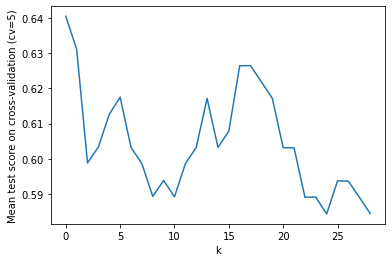

In [8]:
plt.plot(gs.cv_results_['mean_test_score'])
plt.xlabel('k')
plt.ylabel("Mean test score on cross-validation (cv=5)")
print(gs.cv_results_['mean_test_score'])

In [10]:
# исследуем возможность использования различных метрик
def euclid_metric(x, y):
    return np.square(np.abs(x-y).sum())

def lans_wil_metric(x, y):
    return np.abs(x - y).sum() / np.sum(x + y)

def cos_metric(x, y):
    return np.sum(x * y) / (np.sqrt(np.sum(x*x)) * np.sqrt(np.sum(y*y)))

In [11]:
knn = KNeighborsClassifier(n_neighbors=17, algorithm='brute')
params = {'metric': (euclid_metric, lans_wil_metric, cos_metric)}
gs = GridSearchCV(knn, param_grid=params, cv=5)
gs.fit(X, y)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(algorithm='brute', n_neighbors=17),
             param_grid={'metric': (<function euclid_metric at 0x0000020E0FB721F0>,
                                    <function lans_wil_metric at 0x0000020E0F3C4CA0>,
                                    <function cos_metric at 0x0000020E0FB720D0>)})

In [12]:
gs.best_estimator_, gs.best_score_

(KNeighborsClassifier(algorithm='brute',
                      metric=<function euclid_metric at 0x0000020E0FB721F0>,
                      n_neighbors=17),
 0.626467331118494)

[0.62646733 0.62646733 0.32259136]


Text(0, 0.5, 'mean test score')

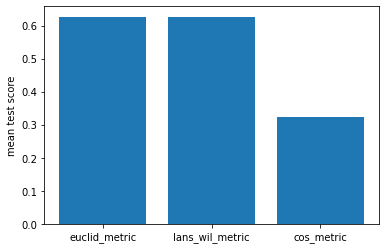

In [13]:
print(gs.cv_results_['mean_test_score'])
plt.bar(['euclid_metric', 'lans_wil_metric', 'cos_metric'], gs.cv_results_['mean_test_score'])
plt.ylabel('mean test score')

In [14]:
# "Определите, к какому типу стекла относится экземпляр с характеристиками"
# RI =1.516 Na =11.7 Mg =1.01 Al =1.19 Si =72.59 K=0.43 Ca =11.44 Ba =0.02 Fe =0.1
input = [[1.516, 11.7, 1.01, 1.19, 72.59, 0.43, 11.44, 0.02, 0.1]]
best_estimator = gs.best_estimator_
pred = best_estimator.predict(input)
pred

array([5], dtype=int64)

*5 - класс "контейнеры"*

In [52]:
# "Определите, какой из признаков оказывает наименьшее влияние 
# на определение класса путем последовательного исключения каждого признака."
res = dict()
for cat in X.columns:
    if cat not in res.keys():
        res[cat] = []
    
    for i in range(100):
        # 100 раз создадим случайную модель и обучим без признака cat
        X_new = X.drop(cat, axis=1)
        X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1)
        clf = KNeighborsClassifier(n_neighbors=17)
        clf.fit(X_train, y_train)
        res[cat].append(clf.score(X_test, y_test))
    res[cat] = np.mean(res[cat])

dict_items([(2, 0.6340909090909091), (3, 0.6336363636363637), (4, 0.6481818181818183), (5, 0.63), (6, 0.62), (7, 0.6395454545454545), (8, 0.604090909090909), (9, 0.6422727272727272), (10, 0.6463636363636363)])

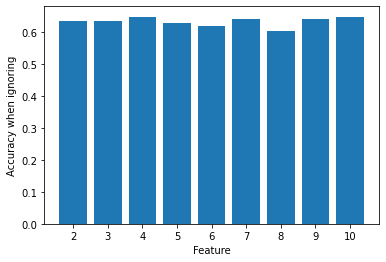

In [55]:
plt.bar(res.keys(), res.values())#, 
plt.xticks(ticks=range(2, 11))
plt.xlabel("Feature")
plt.ylabel("Accuracy when ignoring")
res.items()

*Наименее важный признак каждый раз оказывается различным, сейчас, например, это 4, т.к. его удаление позволяет обучиться лучше всего*

***ЗАДАНИЕ 3***

Для построения классификатора используйте заранее сгенерированные обучающие и тестовые выборки, хранящиеся в файлах svmdata4.txt, svmdata4test.txt. Найдите оптимальное значение k, обеспечивающее наименьшую ошибку классификации. Посмотрите, как выглядят данные на графике, используя функцию
plot(mydata.train$X1, mydata.train$X2, pch=21, bg=c("red","blue") [unclass(mydata.train$Colors)],  main="My train data")

,X1,X2,Colors
1,11.503087,-0.872017,green
2,6.952235,-0.368240,red
3,9.157642,1.058048,green
4,3.921632,1.703045,green
5,4.019569,0.706163,green


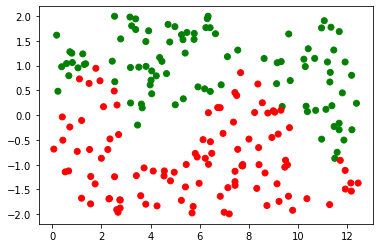

In [281]:
data = pd.read_csv("svmdata4.txt", sep='\t')
plt.scatter(data.X1, data.X2, c=data.Colors)
data.head()

In [282]:
data.Colors = LabelEncoder().fit_transform(data.Colors)
X, y = data.drop("Colors", axis=1), data.Colors

In [332]:
clf = KNeighborsClassifier(algorithm='brute')
params = {'n_neighbors': range(1, 25)}
gs = GridSearchCV(clf, param_grid=params)
gs.fit(X, y)
gs.best_score_, gs.best_estimator_

(0.9650000000000001, KNeighborsClassifier(algorithm='brute', n_neighbors=3))

[0.955 0.945 0.965 0.94  0.955 0.955 0.935 0.935 0.93  0.935 0.93  0.92
 0.925 0.925 0.935 0.925 0.925 0.925 0.915 0.92  0.9   0.925 0.9   0.905]


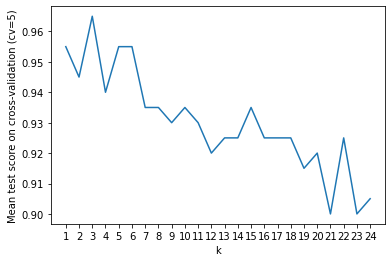

In [333]:
plt.plot(np.arange(1, 25), gs.cv_results_['mean_test_score'])
plt.xlabel('k')
plt.ylabel("Mean test score on cross-validation (cv=5)")
plt.xticks(ticks=range(1, 25))
print(gs.cv_results_['mean_test_score'])

,X1,X2,Colors
1,5.722018,-0.401993,green
2,4.673020,-0.968013,green
3,8.791324,-1.998983,red
4,2.491248,1.143857,green
5,3.805128,1.329185,green


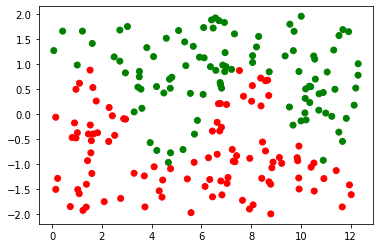

In [334]:
test_data = pd.read_csv("svmdata4test.txt", sep='\t')
plt.scatter(test_data.X1, test_data.X2, c=test_data.Colors)
test_data.head()

In [335]:
test_data.Colors = LabelEncoder().fit_transform(test_data.Colors)
X_test, y_test = test_data.drop("Colors", axis=1), test_data.Colors
clf = gs.best_estimator_
clf.score(X_test, y_test)

0.935

In [336]:
# но можно случайно достичь лучшего результата
stupid_clf = KNeighborsClassifier(n_neighbors=6, algorithm='brute', weights='distance')
stupid_clf.fit(X, y)
stupid_clf.score(X_test, y_test)

0.94

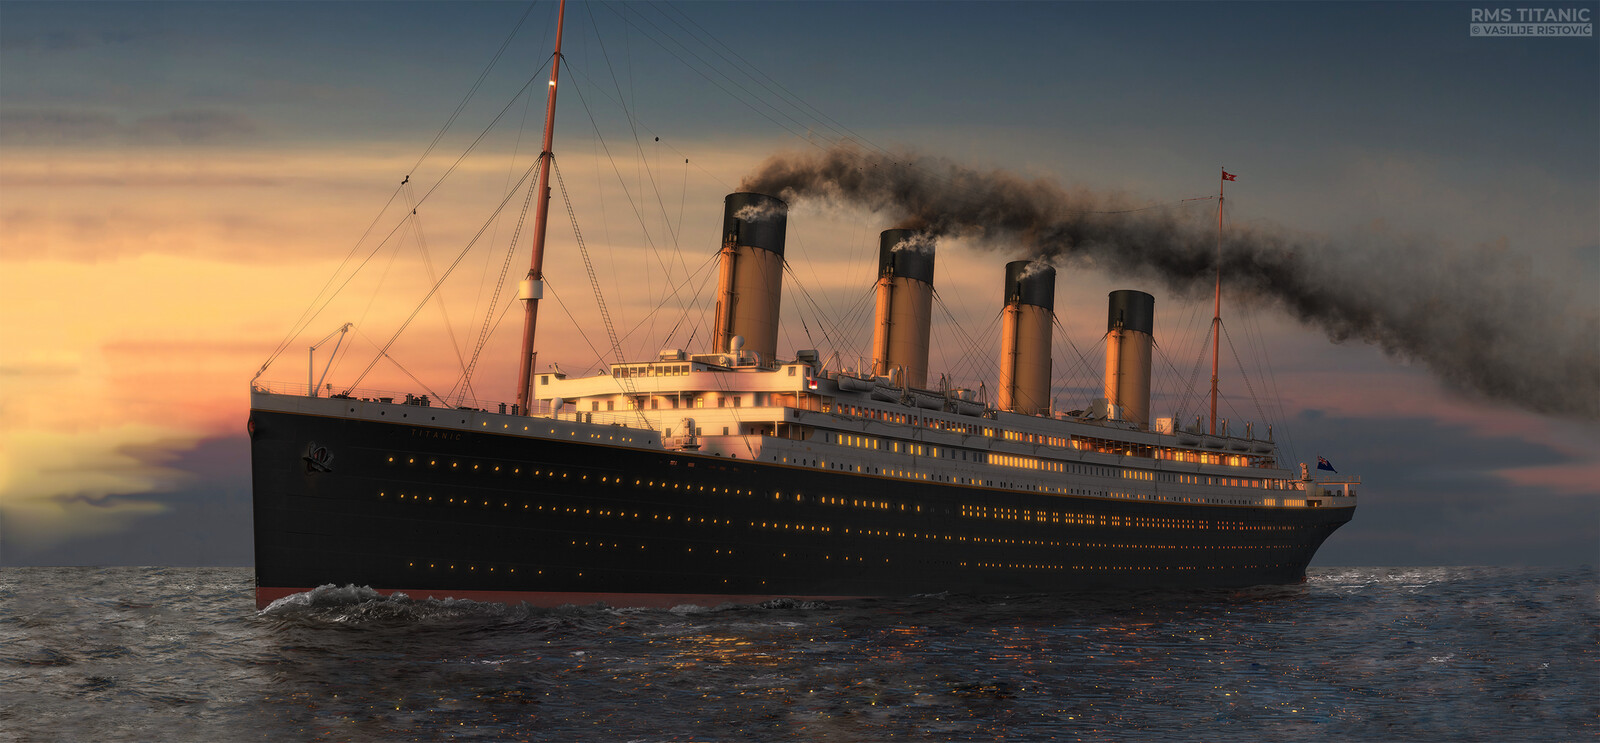

***ЗАДАНИЕ 4***

Разработать классификатор на основе метода ближайших соседей для данных Титаник (Titanic dataset) - https://www.kaggle.com/c/titanic


In [338]:
data_train = pd.read_csv("train.csv", index_col=False)
data_test = pd.read_csv("test.csv", index_col=False)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [339]:
def fillna(column) -> pd.Series:
    filtered = column[column.notna()]
    return column.fillna(value=filtered.mean())

def get_X(dataset):
    X = dataset.drop(["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis=1)
    if "Survived" in X.columns:
        X = X.drop("Survived", axis=1)
    X.Sex = X.Sex.map(lambda s: int(s == 'male')) # пропущенных значений пола в датасете нет (nunique() == 2)
    # теперь заполним пропуски в X.Age (средним значением)
    X.Age = fillna(X.Age)
    X.Fare = fillna(X.Fare)
    return X 

def get_y(dataset):
    return dataset.Survived

X, y = get_X(data_train), get_y(data_train)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [341]:
clf = KNeighborsClassifier(algorithm='brute')
params = {'n_neighbors': range(1, 50), 'weights': ('uniform', 'distance')}
gs = GridSearchCV(clf, param_grid=params)
gs.fit(X, y)
gs.best_score_, gs.best_estimator_

(0.7240097922289875,
 KNeighborsClassifier(algorithm='brute', n_neighbors=29, weights='distance'))

In [343]:
best_clf = KNeighborsClassifier(algorithm='brute', n_neighbors=29, weights='distance')
best_clf.fit(X, y)

KNeighborsClassifier(algorithm='brute', n_neighbors=29, weights='distance')

In [345]:
X_test = get_X(data_test)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875


In [348]:
y_pred = gs.best_estimator_.predict(X_test)
res = pd.DataFrame(data={'PassengerId': [i for i in range(892, 1310)], 'Survived': y_pred})
res

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [349]:
res.to_csv('out.csv', index=False)

*Получилось похуже, чем с наивным методом Байеса*

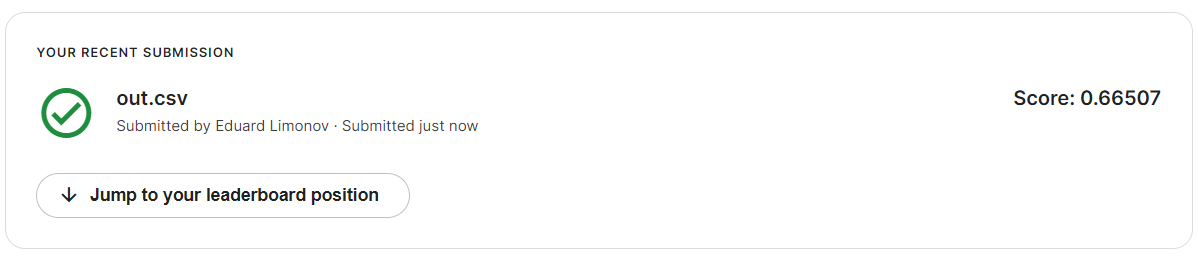